### LAB 1 - Titanic  

Name: Nguyễn Cao Sơn  
Student ID: 21127159  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1. Preprocessing  

In [2]:
# Read data
train_data = pd.read_csv('../data/train.csv')  

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- `PassengerId`: ID of passenger  
- `Pclass`: Ticket class  
- `Name`: Name of passenger  
- `Sex`: Gender of passenger  
- `Age`: Age of passenger  
- `SibSp`: Number of siblings/spouses aboard
- `Parch`: Number of parents/children aboard
- `Ticket`: Ticket number
- `Fare`: Passenger fare
- `Cabin`: Cabin number
- `Embarked`: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)  

In [4]:
train_data.shape

(891, 12)

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# check for missing values
train_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age and Cabin have too many missing values, so I will drop them below.

In [7]:
# check for duplicates
train_data.duplicated().sum()

0

-  We dont have duplicate values in this dataset.

In [8]:
cate_features = train_data.select_dtypes(include=[object])

cate_features.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

- 'Name' and 'Ticket' are not useful for prediction
- 'Cabin' has too many missing values

-> So we drop these columns and onehot-encoding for Sex and Embarked

In [9]:
# one-hot encoding for Sex, Embarked 
df_copy = train_data.copy()

col_onehot = ['Sex', 'Embarked']
df_copy = pd.get_dummies(train_data , columns = col_onehot)
df_copy.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_copy = df_copy.astype(float)
df_copy.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0


## 2. Visualization

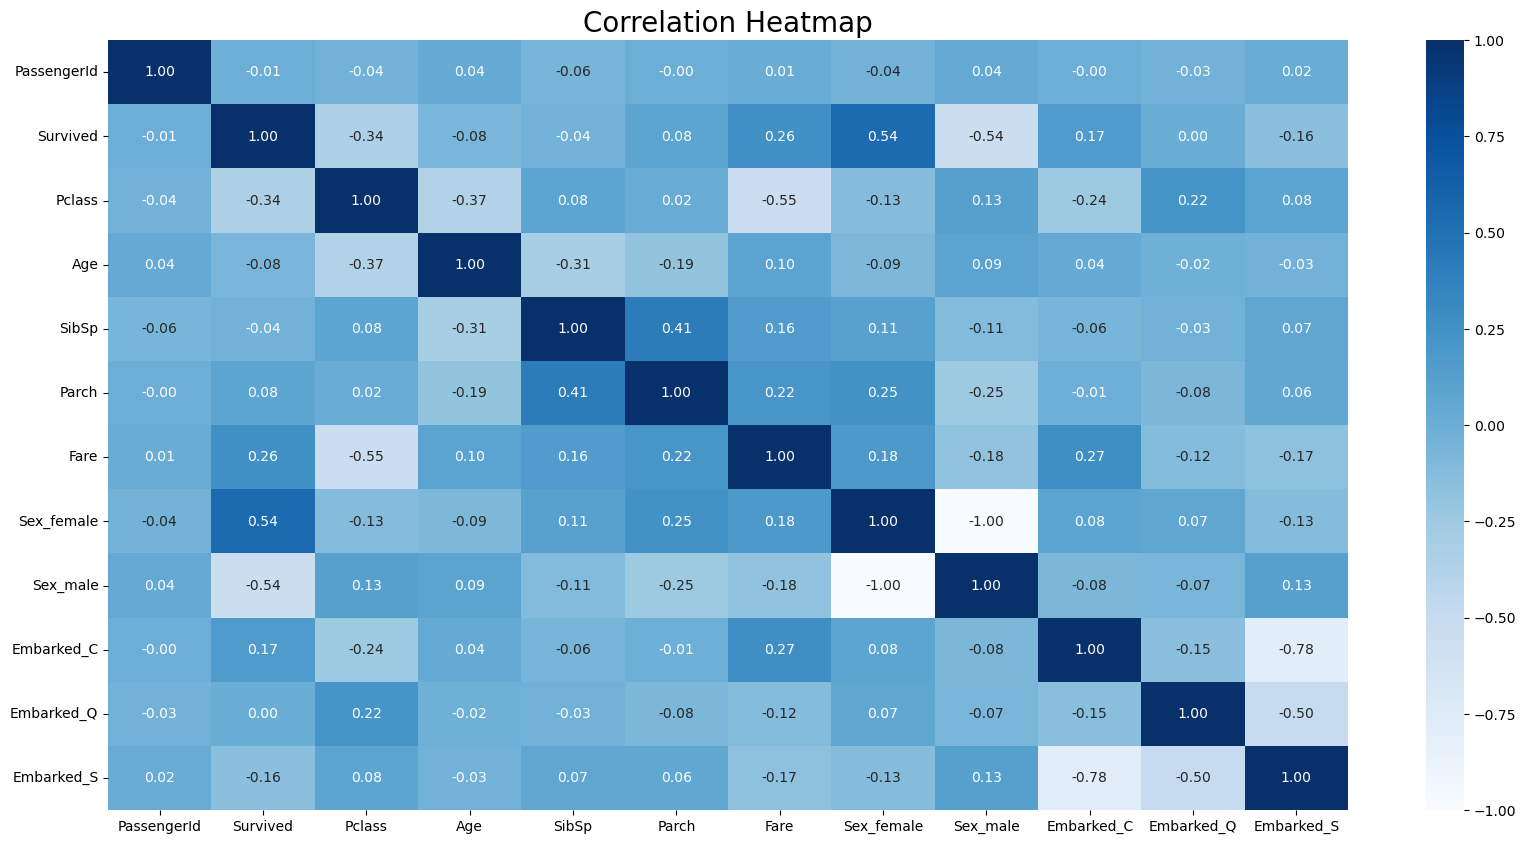

In [10]:
# heatmap
fig, ax = plt.subplots(figsize=(20,10))
heatmap = sns.heatmap(df_copy.corr(), annot=True, cmap='Blues', fmt='.2f')

ax.set_title('Correlation Heatmap', fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.show()


## 3.Observations:  
Factors that can greatly influence `Survived` are `Sex`, `Pclass`, `Fare` because they have strong correlation. Let's also clarify it:  
- Pclass higher mean passenger fare is higher. With business class spacious seats as well as passenger knowledge that can help in survival.  
- Male or female can have different survival rate because of the physical condition. 
- The remaining factors do not appear to affect survival because the correlation is so weak.  